In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
import os


# path = "C:/Users/meide/Documents/GitHub/Master/data"
path = "data/"
os.chdir(path)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'data/'

In [21]:
# iML1515
df = pd.read_csv("1515_4_PCA.csv", index_col =0, usecols = list(range(8,216)))


#E. coli core
# df = pd.read_csv("core_4_PCA.csv", index_col=0, usecols = list(range(7,215)))

df.shape

(963, 207)

sanitize


In [22]:
import numpy as np

# df.replace(np.nan, 0) # fml

df["BCUT2D_MWHI"] = df["BCUT2D_MWHI"].replace(np.nan, 0)

df["BCUT2D_MWLOW"] = df["BCUT2D_MWLOW"].replace(np.nan, 0)

df["BCUT2D_CHGHI"] = df["BCUT2D_CHGHI"].replace(np.nan, 0)

df["BCUT2D_LOGPHI"] = df["BCUT2D_LOGPHI"].replace(np.nan, 0)

df["BCUT2D_LOGPLOW"] = df["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df["BCUT2D_CHGLO"] = df["BCUT2D_CHGLO"].replace(np.nan, 0)

df["BCUT2D_MRHI"] = df["BCUT2D_MRHI"].replace(np.nan, 0)

df["BCUT2D_MRLOW"] = df["BCUT2D_MRLOW"].replace(np.nan, 0)

df["MaxPartialCharge"] = df["MaxPartialCharge"].replace(np.nan, 0)

df["MinPartialCharge"] = df["MinPartialCharge"].replace(np.nan, 0)

df["MaxAbsPartialCharge"] = df["MaxAbsPartialCharge"].replace(np.nan, 0)

df["MinAbsPartialCharge"] = df["MinAbsPartialCharge"].replace(np.nan, 0)

#### Removes entries from df with missing or zero values

In [23]:
df = df.loc[:,((df !=0).sum() >df.shape[0]*0.90 )]

features = df.columns.values.tolist()

x = df.loc[:, features].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components = 5)



principalComponents = pca.fit_transform(x)

print("Explained variation per principal component: {}".format(pca.explained_variance_))
print(np.cumsum(pca.explained_variance_ratio_))

Explained variation per principal component: [31.18487952  7.76291634  2.92208627  2.40546513  1.47490614]
[0.56640903 0.70740639 0.76048006 0.80417038 0.83095901]


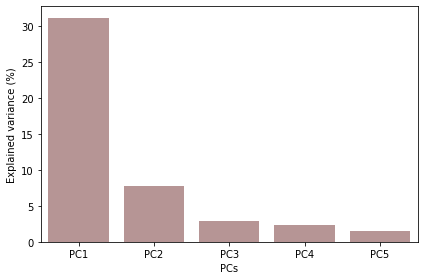

In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt
df2 = pd.DataFrame({'var':pca.explained_variance_, 'PC':['PC1','PC2','PC3','PC4','PC5']})
sns
fig = sns.barplot(x='PC',y="var", data=df2, color="lightblue")
fig.set(xlabel ="PCs", ylabel = "Explained variance (%)")
plt.tight_layout()
plt.show()

In [16]:
df_st =  StandardScaler().fit_transform(df)
pca_out = PCA().fit(df_st)
print(pca_out.explained_variance_ratio_)

print(np.cumsum(pca_out.explained_variance_ratio_))
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')

df2 = pd.DataFrame({'var':pca_out.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4','PC5']})

import seaborn as sns 
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()



[3.34206824e-01 7.09856990e-02 5.70801321e-02 5.20688838e-02
 4.03263429e-02 3.30969430e-02 2.73312791e-02 2.60570687e-02
 2.15705365e-02 1.67023965e-02 1.53199546e-02 1.41194292e-02
 1.36925732e-02 1.23764785e-02 1.17307705e-02 1.13541354e-02
 1.08706868e-02 9.97253059e-03 9.63310970e-03 9.18836710e-03
 8.49477194e-03 8.28696391e-03 7.89149822e-03 7.44470342e-03
 7.11309423e-03 6.84390255e-03 6.59261975e-03 6.35107586e-03
 6.24577757e-03 6.13166489e-03 5.78665253e-03 5.67821325e-03
 5.55420864e-03 5.52220607e-03 5.42784612e-03 5.14355266e-03
 5.13910172e-03 4.83894511e-03 4.61235081e-03 4.50151596e-03
 4.38155946e-03 4.05693948e-03 3.91993982e-03 3.81376397e-03
 3.62543045e-03 3.20902042e-03 3.10446724e-03 3.03499910e-03
 2.80263745e-03 2.70781365e-03 2.64535798e-03 2.49136202e-03
 2.43250368e-03 2.29627673e-03 2.17981708e-03 2.09914631e-03
 1.93017516e-03 1.75411461e-03 1.66035265e-03 1.49569952e-03
 1.39249507e-03 1.31846405e-03 1.26367098e-03 1.19424776e-03
 1.13276950e-03 1.089530

ValueError: All arrays must be of the same length

In [ ]:
sns.barplot(x='PC',y="var", data=df2, color="c")
plt.show()


In [ ]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])


In [9]:
loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2","PC3", "PC4", "PC5"], index=df.columns.values)
# loadings

In [11]:
import bioinfokit.visuz as viz
cluster.screeplot(obj=[loadings.column.values, pca.explained_variance_ratio_])
df2 = pd.DataFrame({'var':pca_out.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="var", data=df2, color="c")
plt.show()

NameError: name 'cluster' is not defined

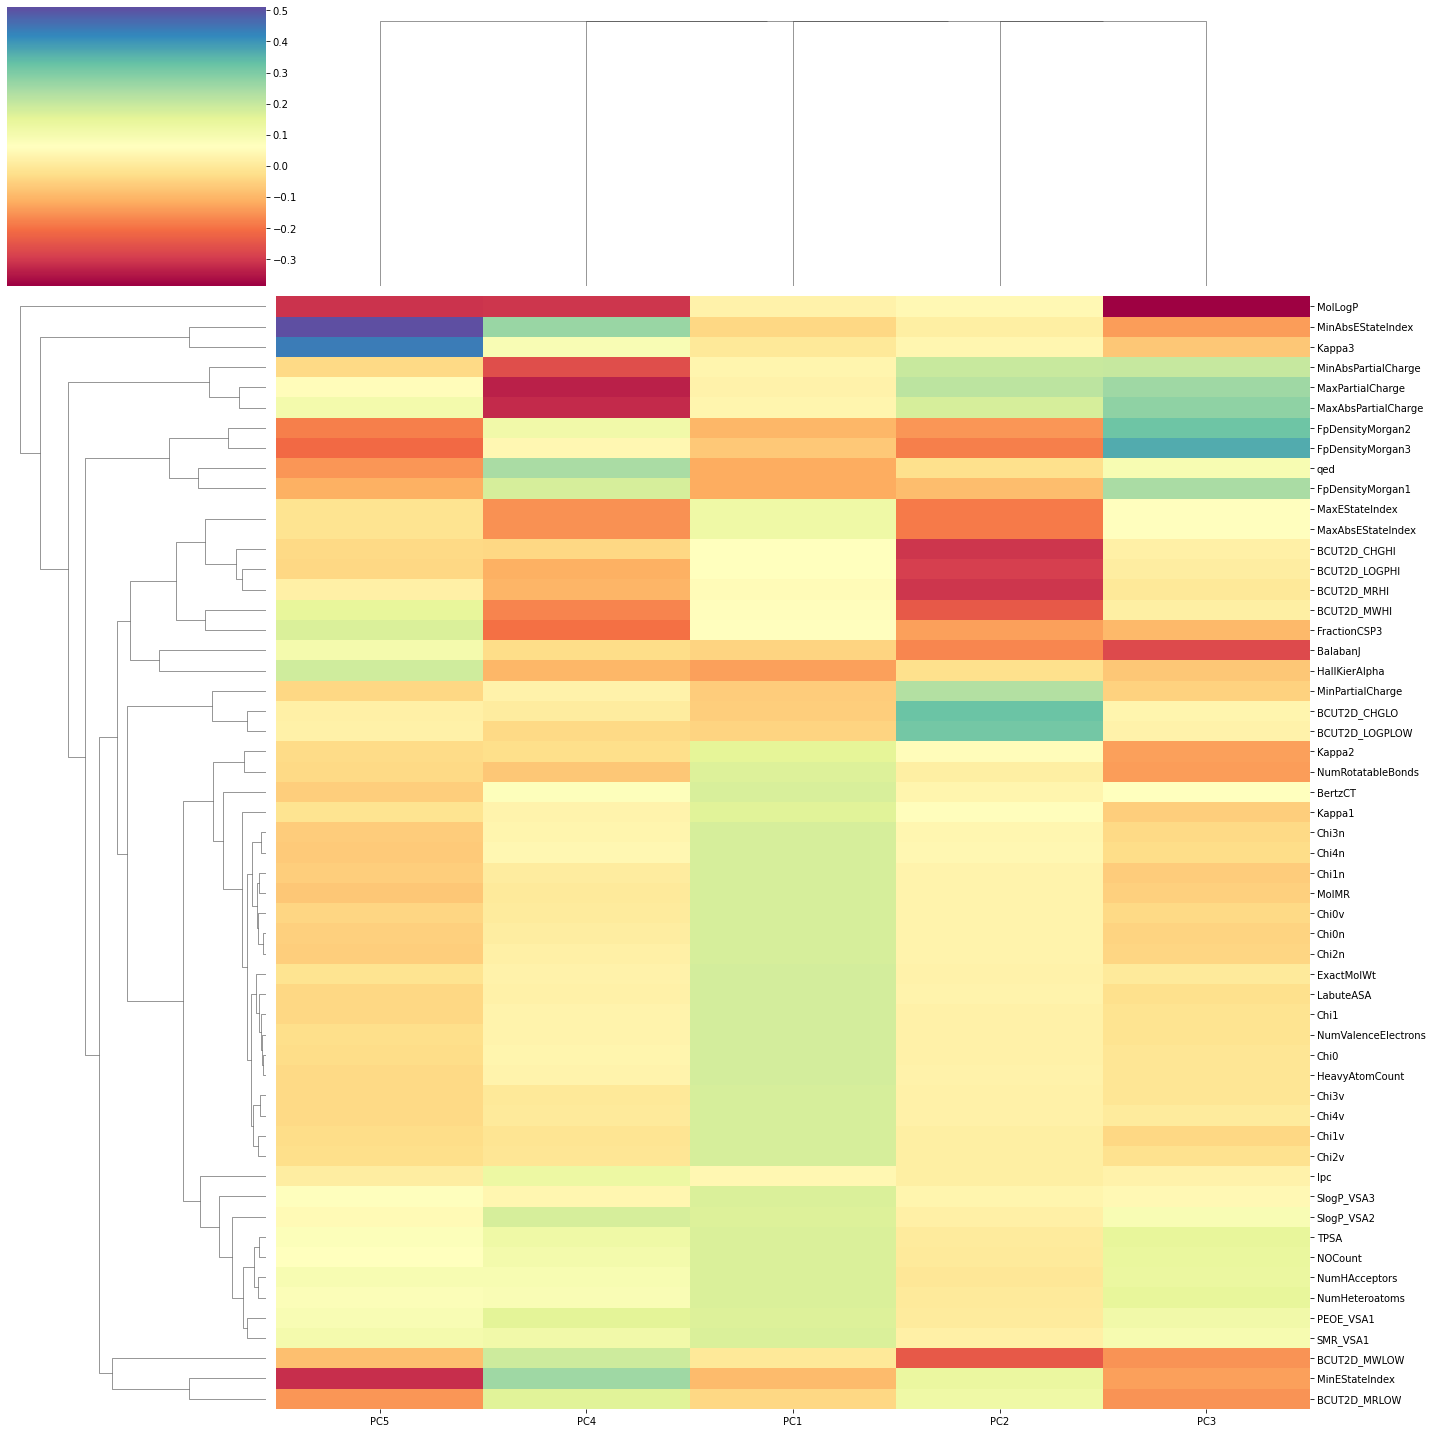

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.clustermap(loadings, annot=False, cmap='Spectral', figsize=(20,20))
plt.tight_layout()
plt.show()

In [89]:
df = df.loc[:,((df !=0).sum() >df.shape[0]*0.9 )]


In [57]:
df.shape

(963, 53)

In [75]:
features = df.columns.values.tolist()

In [76]:
x = df.loc[:, features].values

# print(x)

In [77]:
y  = df.loc[:, features].values

# print(y)

In [81]:
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)

In [84]:
pca = PCA(n_components = 5)

principalComponents = pca.fit_transform(x,y)

In [50]:
PCA_df = pd.DataFrame(data = principalComponents, 
columns =["PC1","PC2", "PC3", "PC4", "PC5"])


# PCA_df.head(5)

In [17]:
PCA_df.insert(0, "BiGG", BiGG_list)
PCA_df.insert(1, "MNXM", MNXM_list)

dfName = pd.read_csv("Calc.csv")
PCA_df.insert(2, "Name", dfName["Name"])

In [18]:
PCA_df.head(5)

,BiGG,MNXM,Name,PC1,PC2,PC3,PC4,PC5
0,M_h_c,MNXM1,H(+),-7.474676,17.775655,33.581445,11.376593,-0.628991
1,M_nadh_c,MNXM10,NADH,2.449760,-0.822128,-0.358830,1.642180,-0.940625
2,M_grdp_c,MNXM100,(2E)-geranyl diphosphate,-1.685173,-1.714967,-0.050377,0.738661,0.495653
3,M_btal_c,MNXM1017,butanal,-4.473741,0.702321,0.211739,-1.544957,0.398221
4,M_dtbt_c,MNXM1020,"(4R,5S)-dethiobiotin",-2.724062,-0.281604,-0.040466,-0.317529,-0.055734


In [25]:
# PCA_df.to_csv("PCA_test.csv")

In [19]:
dfName = pd.read_csv("Calc.csv")

In [ ]:
PCA_df.insert(2, "Name", dfName["Name"])

In [54]:
# PCA_df.to_csv("PCA_test.csv")

In [85]:
print("Explained variation per principal component: {}".format(pca.explained_variance_))

Explained variation per principal component: [29.7603549   7.49441281  2.91348144  2.34923347  1.47414954]


(-5.0, 15.0)

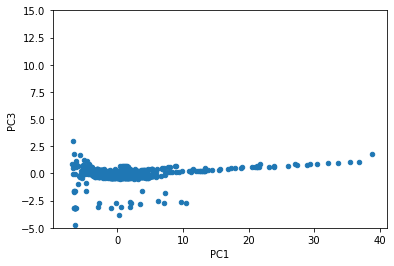

In [31]:
ax  = PCA_df.plot.scatter(x = "PC1", y ="PC3")
ax.set_ylim(-5, 15)

In [174]:
# CORE
# df = pd.read_csv("core_no_mass.csv", index_col = 0, usecols = [13,14,15] +  list(range(22,227))) # [13,14,15] +


# 1515 
# df = pd.read_csv("1515_no_mass.csv", index_col = 0, usecols = [4,5,6] + list(range(22,227)))#  usecols = [4,5,6] + list(range(22,227 for

In [186]:
import plotly.express as px
import kaleido as kd
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import sklearn as sk
import plotly.io as pio
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


GEM = input("1515 or core? ")
# CORE
df = pd.read_csv(f"{GEM}_no_mass.csv", index_col = 0, usecols = [13,14,15] +  list(range(22,227))) # [13,14,15] +
dfBiGG = pd.read_csv(f"{GEM}_no_mass.csv")


# 1515 
#df = pd.read_csv("1515_no_mass.csv", index_col = 0, usecols = [4,5,6] + list(range(22,227)))#  usecols = [4,5,6] + list(range(22,227 for
#dfBiGG = pd.read_csv("1515_no_mass.csv")


BiGG_list = dfBiGG["BiGG"].tolist()

df.replace(np.nan, 0) # fml
df["BCUT2D_MWHI"] = df["BCUT2D_MWHI"].replace(np.nan, 0)

df["BCUT2D_MWLOW"] = df["BCUT2D_MWLOW"].replace(np.nan, 0)

df["BCUT2D_CHGHI"] = df["BCUT2D_CHGHI"].replace(np.nan, 0)

df["BCUT2D_LOGPHI"] = df["BCUT2D_LOGPHI"].replace(np.nan, 0)

df["BCUT2D_LOGPLOW"] = df["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df["BCUT2D_CHGLO"] = df["BCUT2D_CHGLO"].replace(np.nan, 0)

df["BCUT2D_MRHI"] = df["BCUT2D_MRHI"].replace(np.nan, 0)

df["BCUT2D_MRLOW"] = df["BCUT2D_MRLOW"].replace(np.nan, 0)

df["MaxPartialCharge"] = df["MaxPartialCharge"].replace(np.nan, 0)

df["MinPartialCharge"] = df["MinPartialCharge"].replace(np.nan, 0)

df["MaxAbsPartialCharge"] = df["MaxAbsPartialCharge"].replace(np.nan, 0)

df["MinAbsPartialCharge"] = df["MinAbsPartialCharge"].replace(np.nan, 0)

df = df.loc[:,((df !=0).sum() >df.shape[0]*0.90 )]

start_time = time.time()

pio.kaleido.scope.default_format = "svg"


# Lists RDkit computed features
features = df.columns.values.tolist()

# Remove the Name column from the feature list
features.pop(0) 



xx = df.loc[:,df.columns].values # Get computed values from each feature
xx = StandardScaler().fit_transform(df[features]) # Normalize data 
df = pd.DataFrame(xx, columns = features)  # Stitch it back together
pca = PCA() # Instantiate PCA class,

components = pca.fit_transform(df[features])    # 
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

####### PARAMETERS ####### 
#  number_components 
#
#  legend
#  
#######  #######   #######  
number_components = 5
legend = BiGG_list

if GEM == "core":
    GEM_string = "E.coli core" 
else:
        GEM_string = "iML1515" 

fig = px.scatter_matrix(
    components,
    labels = labels,
    dimensions = range(number_components),  # Number of component, for the PCA set, linear behavior comes on component 5 (for the GEM) and gives descriptive (~ 80 %)
    color = legend,  # Sets what each metabolite is colored by (<numerical feature> for gradient  & "Name" for labelling each metabolite as a  )
    title = f"Principal component analysis for metabolites in the {GEM_string} GEM <br><sup>{number_components} components</sup>", #  Sets title, allows some html formatting tags
 
)

# Centers title
fig.update_layout(title_x=0.5)


fig.update_traces(diagonal_visible=False)
fig.update_layout (
    width = 2560,
    height = 1440
)


# Changes the legend string
fig.update_layout( 
    legend=dict(
        title = "Metabolites", 
    )
)


# fig.add_annotation( # add a text callout with arrow
   # text= "big boi!", x="NADH", arrowhead=1, showarrow=True
# )

# Write_png() requires kaleido

print("Attempting to write html GLHF %s" % (time.time() - start_time))

fig.write_html(f"Plotly images\{GEM}_PCA_{number_components}_test_HAHAHAHA.html")
# fig.write_html(f"Plotly images\PCA_{number_components}_components_4K_MASS.html")

print("HTMl write successful %s" % (time.time() - start_time))



# fig.show()



# print("Attempting to write image GLHF %s" % (time.time() - start_time))

# fig.write_image(f"Plotly images\PCA_{number_components}_components_5K.svg", engine = "kaleido")

# print("Image write successful %s" % (time.time() - start_time))

# print("Explained variation per principal component: {}".format(pca.explained_variance_ * 100))

Attempting to write html GLHF 4.793627023696899
HTMl write successful 4.906209468841553


#### Seaborn PCA plots


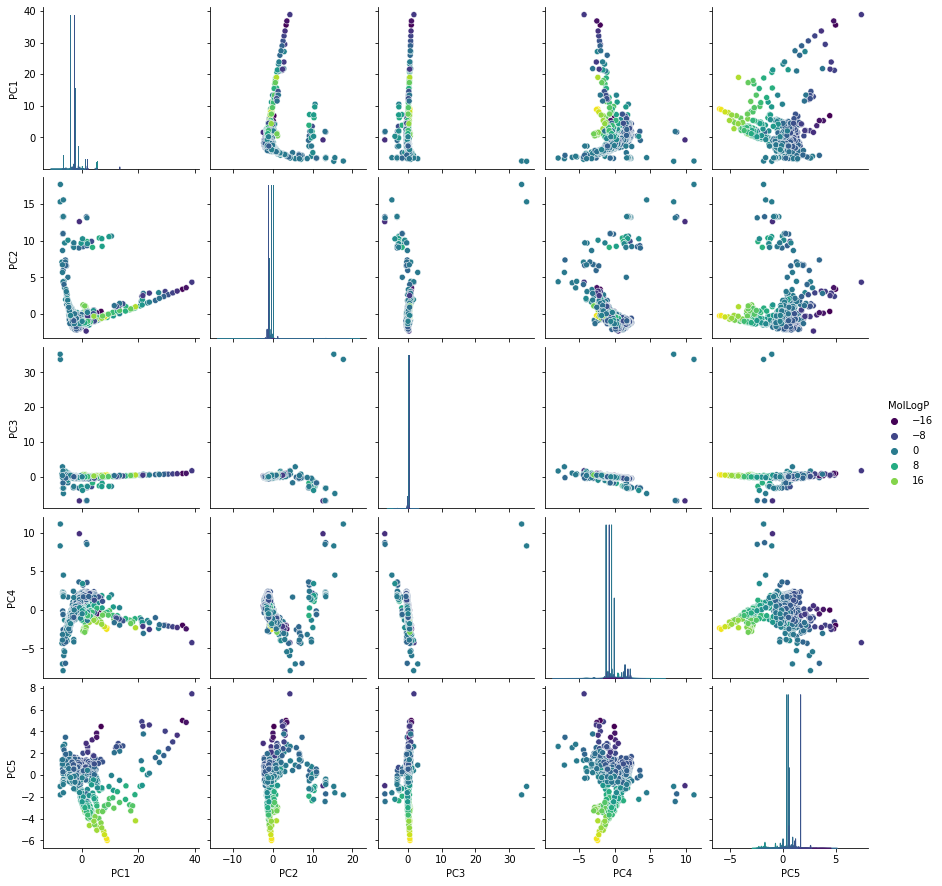

In [4]:
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt

# Enter genome-scale model: "core" or "1515"
model = input("Enter core or 1515")

# Enter the name of descriptor the nodes will be hued with
legend = "MolLogP"

df = pd.read_csv(f"{model}.csv")


sns_plot = sns.pairplot(df, hue = legend, vars=['PC1', 'PC2','PC3','PC4','PC5'], palette='viridis')

sns_plot.savefig(f"Seaborn/{model}_PCA_{legend}_pairplot.png")
# sns_plot.savefig(f"Seaborn/{model}_PCA_{legend}_pairplot.svg")


LinAlgError: singular matrix

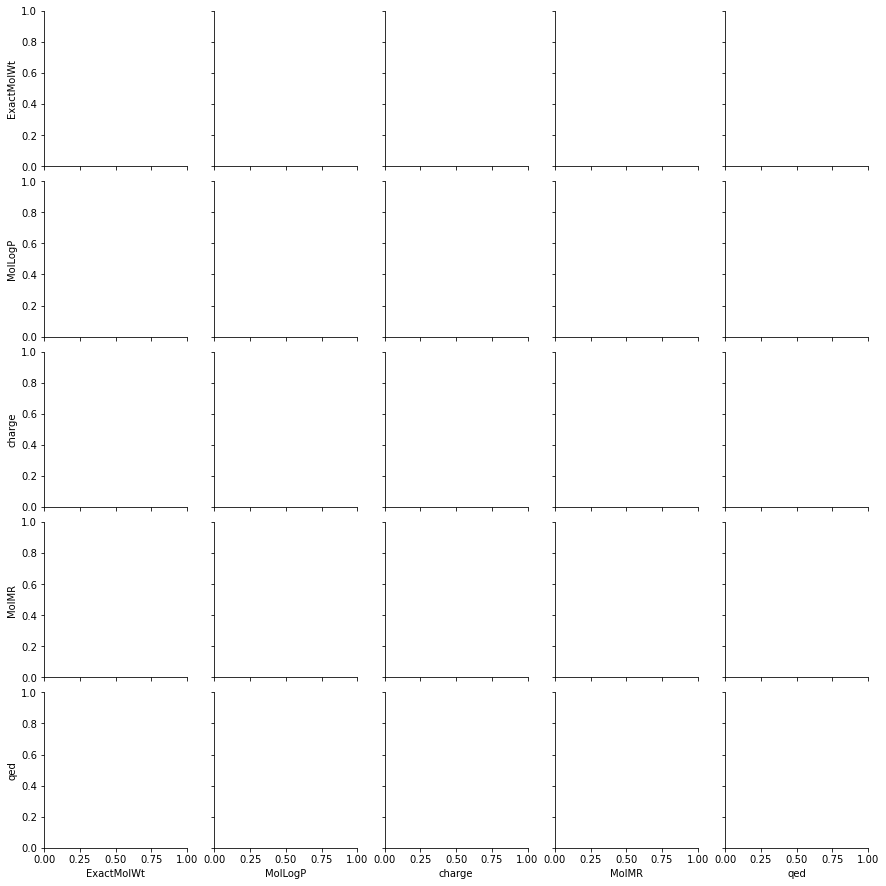

In [38]:
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt

# Enter genome-scale model: "core" or "1515"
model = "1515" # input("Enter core or 1515")

# Enter the name of descriptor the nodes will be hued with
legend = "mass_rank"

df = pd.read_csv(f"{model}.csv")
var_1 = "ExactMolWt"
var_2 = "MolLogP"
var_3 = "charge"    
var_4 = "MolMR"
var_5 = "qed"


sns_plot = sns.pairplot(df, hue = legend, vars=['ExactMolWt', 'MolLogP','charge','MolMR','qed'], palette='viridis')

# sns_plot = sns.pairplot(df, hue = legend, vars=[var_1, var_2, var_3, var_4, var_5], palette='viridis')

sns_plot.savefig(f"Seaborn/{model}_descriptors_{legend}_pairplot.png")
sns_plot.savefig(f"Seaborn/{model}_descriptors_{legend}_pairplot.svg")
